#Install Dependencies and Setup

In [16]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [17]:
#!pip list

In [19]:
import os

In [21]:
data_dir = 'data'

In [22]:
#data_dir = '/content/data' 
#if not os.path.exists(data_dir):
    #os.mkdir(data_dir)

In [23]:
sad = os.path.join(data_dir , "sad")
#if not os.path.exists(sad):
    #os.mkdir(sad)

In [24]:
Happy = os.path.join(data_dir , "Happy")
#if not os.path.exists(Happy):
    #os.mkdir(Happy)

In [25]:
import tensorflow as tf

# Remove dodgy images

In [26]:
import cv2
import imghdr

In [27]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [28]:
for image_c in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir , image_c)):
    #print(image)
    image_path = os.path.join(data_dir,image_c,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts :
        os.remove(image_path)
    except Exception as e :
      print("issue with image {} ".format(image_path))



# load data

In [29]:
import numpy as np
from matplotlib import pyplot as plt

In [31]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 305 files belonging to 2 classes.


In [32]:
data_iterator = data.as_numpy_iterator()

In [33]:
batch = data_iterator.next()

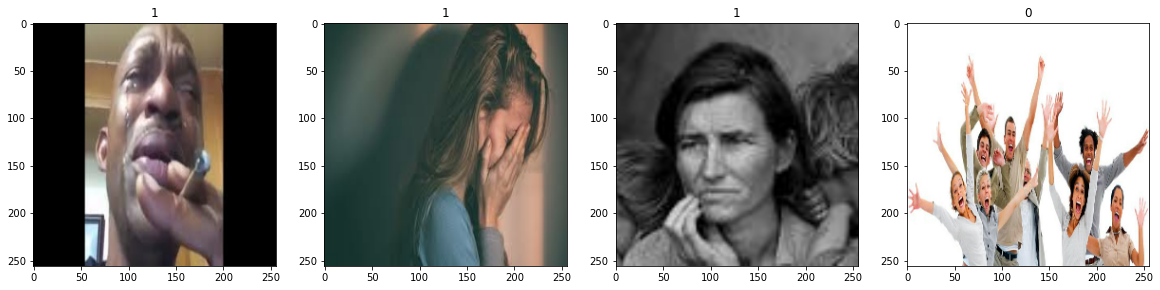

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [35]:
batch[0]

array([[[[  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         ...,
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]],

        [[  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         ...,
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]],

        [[  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         ...,
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]],

        ...,

        [[  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]

# Scale Data

In [36]:
data = data.map(lambda x,y: (x/255, y))

In [37]:
data.as_numpy_iterator().next()

(array([[[[0.9529412 , 1.        , 0.99215686],
          [0.9525046 , 0.9995634 , 0.99172026],
          [0.94756436, 0.9946232 , 0.98678005],
          ...,
          [0.99215686, 0.99215686, 1.        ],
          [0.99215686, 0.99215686, 1.        ],
          [0.99215686, 0.99215686, 1.        ]],
 
         [[0.9529412 , 1.        , 0.99215686],
          [0.9522548 , 0.9993136 , 0.99147046],
          [0.9457366 , 0.9927954 , 0.9849523 ],
          ...,
          [0.99215686, 0.99215686, 1.        ],
          [0.99215686, 0.99215686, 1.        ],
          [0.99215686, 0.99215686, 1.        ]],
 
         [[0.9540253 , 0.9988323 , 0.9921151 ],
          [0.9521934 , 0.99700034, 0.99028313],
          [0.9454963 , 0.99030334, 0.9835861 ],
          ...,
          [0.99215686, 0.99215686, 1.        ],
          [0.99215686, 0.99215686, 1.        ],
          [0.99215686, 0.99215686, 1.        ]],
 
         ...,
 
         [[0.4936476 , 0.43482408, 0.3210986 ],
          [0.76027

# Split Data

In [38]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [39]:
train_size

7

In [40]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#Build Deep Learning Model

In [41]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#Train

In [47]:
logdir='logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 18s 2s/step - loss: 1.1300 - accuracy: 0.5357 - val_loss: 0.6749 - val_accuracy: 0.6875
Epoch 2/20
7/7 [==============================] - 12s 2s/step - loss: 0.6911 - accuracy: 0.5893 - val_loss: 0.6545 - val_accuracy: 0.7188
Epoch 3/20
7/7 [==============================] - 13s 1s/step - loss: 0.6487 - accuracy: 0.7455 - val_loss: 0.5671 - val_accuracy: 0.7812
Epoch 4/20
7/7 [==============================] - 13s 1s/step - loss: 0.5092 - accuracy: 0.7723 - val_loss: 0.3731 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 13s 2s/step - loss: 0.4717 - accuracy: 0.7902 - val_loss: 0.5022 - val_accuracy: 0.7188
Epoch 6/20
7/7 [==============================] - 14s 2s/step - loss: 0.4380 - accuracy: 0.8080 - val_loss: 0.5123 - val_accuracy: 0.7500
Epoch 7/20
7/7 [==============================] - 14s 2s/step - loss: 0.3889 - accuracy: 0.8393 - val_loss: 0.3552 - val_accuracy: 0.8750
Epoch 8/20
7/7 [==================

#Plot Performance

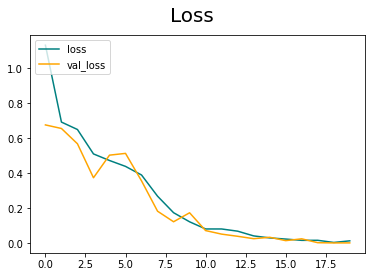

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

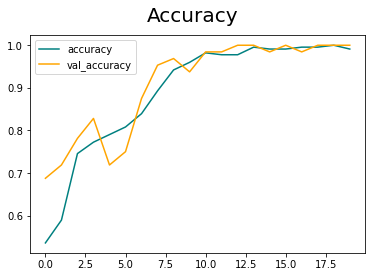

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#Evaluate

In [52]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [53]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [54]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [55]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


#Test

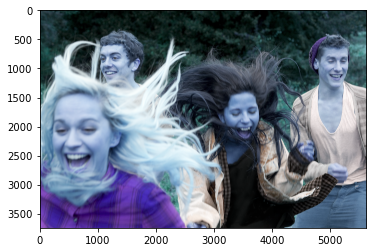

In [56]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

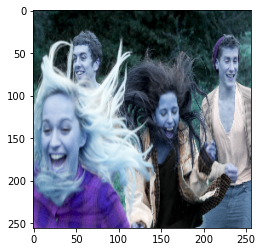

In [57]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [59]:
yhat

array([[0.00131723]], dtype=float32)

In [60]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


#Save the Model

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model.save(os.path.join('models','imageclassifier.h5'))

In [64]:
new_model = load_model('models/imageclassifier.h5')

In [65]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.00131723]], dtype=float32)